# Titanic Survival Predictions
- https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner

### Contents:
1. Import Necessary Libraries
2. Read In and Explore the Data
3. Data Analysis
4. Data Visualization
5. Cleaning Data
6. Choosing the Best Model
7. Creating Submission File

# 1. Import Necessary Libraries
First off, we need to import several Python libraries such as numpy, pandas, matplotlib and seaborn.

In [61]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [62]:
import os

# 2. Data Features Extraction (completed)

In [63]:
# features are already extracted in this case

train = pd.read_csv("C:/Users/Alicia/Desktop/titanic/train_features.csv")
test = pd.read_csv("C:/Users/Alicia/Desktop/titanic/test_features.csv")

# 3. Choosing the Best Model (same steps as other notebook from SVM)

### Splitting the Training Data
We will use part of our training data (22% in this case) to test the accuracy of our different models.

In [94]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [95]:
predictors.head()

,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,3,0,1,0,1,4,0,1,1
1,1,1,1,0,2,6,1,3,4
2,3,1,0,0,1,5,0,2,2
3,1,1,1,0,1,5,1,3,4
4,3,0,0,0,1,5,0,1,2


In [96]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Testing Different Models
I will be testing the following models with my training data (got the list from [here](http://https://www.kaggle.com/startupsci/titanic-data-science-solutions)):
* Gaussian Naive Bayes
* Logistic Regression
* Support Vector Machines
* Perceptron
* Decision Tree Classifier
* Random Forest Classifier
* KNN or k-Nearest Neighbors
* Stochastic Gradient Descent
* Gradient Boosting Classifier

For each model, we set the model, fit it with 80% of our training data, predict for 20% of the training data and check the accuracy.

In [99]:
from sklearn.model_selection import cross_val_score

K-fold cross validation, from
https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

In [100]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

78.68


In [103]:
# K-fold cross validation
scores = cross_val_score(gaussian, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
mean_acc_gaussian = scores.mean()

Scores: [0.77142857 0.74285714 0.77142857 0.8        0.75714286 0.75362319
 0.79710145 0.79710145 0.86956522 0.82352941]
Mean: 0.7883777858969675
Standard Deviation: 0.03597846551192398


In [104]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

79.19


In [105]:
# K-fold cross validation
scores = cross_val_score(logreg, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
mean_acc_logreg = scores.mean()

Scores: [0.8        0.78571429 0.8        0.84285714 0.82857143 0.8115942
 0.79710145 0.79710145 0.89855072 0.85294118]
Mean: 0.8214431859700403
Standard Deviation: 0.03305341561449731


In [106]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

82.74


In [108]:
# K-fold cross validation
scores = cross_val_score(svc, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
mean_acc_svc = scores.mean()

Scores: [0.81428571 0.81428571 0.82857143 0.87142857 0.8        0.8115942
 0.79710145 0.82608696 0.86956522 0.86764706]
Mean: 0.8300566313481914
Standard Deviation: 0.027443250915536035


In [109]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

78.68


In [111]:
# K-fold cross validation
scores = cross_val_score(linear_svc, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
mean_acc_linear_svc = scores.mean()

Scores: [0.8        0.77142857 0.8        0.84285714 0.81428571 0.79710145
 0.79710145 0.79710145 0.91304348 0.86764706]
Mean: 0.8200566313481914
Standard Deviation: 0.0402673758525061


In [112]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

78.68


In [114]:
# K-fold cross validation
scores = cross_val_score(perceptron, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
mean_acc_perceptron = scores.mean()

Scores: [0.7        0.61428571 0.82857143 0.81428571 0.81428571 0.84057971
 0.69565217 0.8115942  0.84057971 0.70588235]
Mean: 0.7665716721471199
Standard Deviation: 0.07596986657392364


In [122]:
#Decision Tree 
# this value changes
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

81.22


In [123]:
# K-fold cross validation
scores = cross_val_score(decisiontree, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
mean_acc_decisiontree = scores.mean()

Scores: [0.77142857 0.72857143 0.81428571 0.8        0.81428571 0.73913043
 0.8115942  0.7826087  0.69565217 0.80882353]
Mean: 0.776638046522957
Standard Deviation: 0.039971280148988764


In [125]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

81.73


In [126]:
# K-fold cross validation
from sklearn.model_selection import cross_val_score
#randomforest = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(randomforest, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
mean_acc_randomforest = scores.mean()

Scores: [0.77142857 0.74285714 0.81428571 0.84285714 0.82857143 0.79710145
 0.82608696 0.79710145 0.76811594 0.85294118]
Mean: 0.8041346973572038
Standard Deviation: 0.033592427866723305


In [127]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

77.66


In [130]:
# K-fold cross validation
scores = cross_val_score(knn, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
mean_acc_knn = scores.mean()

Scores: [0.8        0.77142857 0.87142857 0.88571429 0.78571429 0.76811594
 0.76811594 0.82608696 0.85507246 0.83823529]
Mean: 0.8169912312751189
Standard Deviation: 0.04217937640645587


In [134]:
# Stochastic Gradient Descent 
# this value changes
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

79.7


In [137]:
# K-fold cross validation
scores = cross_val_score(sgd, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
mean_acc_sgd = scores.mean()

Scores: [0.7        0.72857143 0.81428571 0.65714286 0.81428571 0.8115942
 0.73913043 0.68115942 0.8115942  0.70588235]
Mean: 0.7463646328096456
Standard Deviation: 0.058400351998673515


In [139]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

84.77


In [140]:
# K-fold cross validation
#from sklearn.model_selection import cross_val_score

scores = cross_val_score(gbk, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
mean_acc_gbk = scores.mean()

Scores: [0.77142857 0.81428571 0.8        0.85714286 0.82857143 0.7826087
 0.7826087  0.79710145 0.84057971 0.83823529]
Mean: 0.8112562416270857
Standard Deviation: 0.02748995849851943


Let's compare the accuracies of each model!

In [142]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk],
    'Mean Score': [mean_acc_svc, mean_acc_knn, mean_acc_logreg, 
              mean_acc_randomforest, mean_acc_gaussian, mean_acc_perceptron,mean_acc_linear_svc, 
                   mean_acc_decisiontree, mean_acc_sgd, mean_acc_gbk]})
models.sort_values(by='Mean Score', ascending=False)

,Model,Score,Mean Score
0,Support Vector Machines,82.74,0.830057
2,Logistic Regression,79.19,0.821443
6,Linear SVC,78.68,0.820057
1,KNN,77.66,0.816991
9,Gradient Boosting Classifier,84.77,0.811256
3,Random Forest,81.73,0.804135
4,Naive Bayes,78.68,0.788378
7,Decision Tree,81.22,0.776638
5,Perceptron,78.68,0.766572
8,Stochastic Gradient Descent,79.70,0.746365


### While SVM has highest mean score, GBK has highest score. 

We will use GBK model, Gradient Boosting Classifer. 

### What is GBK?
- https://youtu.be/ErDgauqnTHk

GBK is also known as gradient descent:
- It is an example of ensemble learning (many models work together), e.g. decision tree. 
- Weights are adjusted based on previous model, reduces errors sequentially.
- Can apply for regression and classification

Weights are adjusted each iteration:
- First iteration weight 1/n
- Subsequent iteration corrrect classification: weight (decreases) = old_weight* exp(-1*learning_rate) / base_1
- Subsequent iteration wrong classification: weight (increases) = old_weight* exp(+1*learning_rate) / base_1

In [146]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(gbk.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.600
Pclass,0.150
SibSp,0.089
FareBand,0.047
AgeGroup,0.043
CabinBool,0.031
Embarked,0.026
Parch,0.013
Sex,0.003


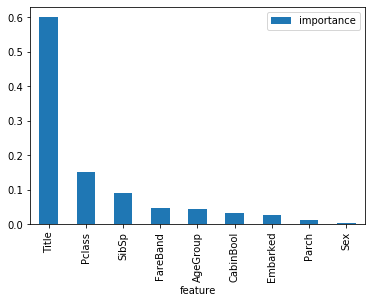

In [147]:
importances.plot.bar() #sex is less important now, accounted for in title

I decided to use the Gradient Boosting Classifier model for the testing data.

# 4. Creating Submission File, Results Analysis
It's time to create a submission.csv file to upload to the Kaggle competition!

In [148]:
#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = gbk.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission_try1.csv', index=False)

In [149]:
predictions[0:4]

array([0, 1, 0, 0], dtype=int64)

In [150]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,892,3,0,0,0,3,5,0,1,1
1,893,3,1,1,0,1,6,0,3,1
2,894,2,0,0,0,3,7,0,1,2
3,895,3,0,0,0,1,5,0,1,2
4,896,3,1,1,1,1,4,0,3,2


In [151]:
test_results = pd.read_csv("C:/Users/Alicia/Desktop/titanic/test_results.csv")

In [152]:
test_results.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand,Survived
0,892,3,0,0,0,3,5,0,1,1,0
1,893,3,1,1,0,1,6,0,3,1,1
2,894,2,0,0,0,3,7,0,1,2,0
3,895,3,0,0,0,1,5,0,1,2,0
4,896,3,1,1,1,1,4,0,3,2,1


In [155]:
test_results.describe(include='all')

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand,Survived
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,0.447368,0.392344,1.464115,4.696172,0.217703,1.755981,2.473684,0.373206
std,120.810458,0.841838,0.481622,0.896760,0.981429,0.685516,1.286728,0.413179,1.058380,1.140292,0.484236
min,892.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,996.250000,1.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000,1.000000,1.000000,0.000000
50%,1100.500000,3.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,2.000000,0.000000
75%,1204.750000,3.000000,1.000000,1.000000,0.000000,2.000000,6.000000,0.000000,2.000000,3.750000,1.000000
max,1309.000000,3.000000,1.000000,8.000000,9.000000,3.000000,7.000000,1.000000,6.000000,4.000000,1.000000


In [257]:
males = 0
females = 0

for i in test_results["Sex"]:
    if (i == 0):
        males = males +1
    else:
        females = females +1
              
print(males, females) # 266 males, 152 females

266 152


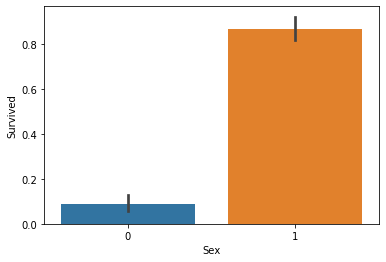

In [254]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=test_results)

#print percentages of females vs. males that survive
#print("Total number survived:"+ str(test_result_original["Survived"].value_counts()))

#print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

In [218]:
survivals = []

count = 0
for i in test_results["Survived"]:
    if (i == 1):
        count = count +1
              
count # 156 of 418 Survived

156

In [260]:
print("Survived No/Yes:\n",test_results["Survived"].value_counts())
print()
print("Survived Female/Male:\n",test_results["Sex"][test_results["Survived"] == 1].value_counts())
print()
print("Not Survived Male/Female:\n",test_results["Sex"][test_results["Survived"] == 0].value_counts())
print()
print("Survived AgeGroup:\n",test_results["AgeGroup"][test_results["Survived"] == 1].value_counts())
print()
print("Not Survived AgeGroup:\n",test_results["AgeGroup"][test_results["Survived"] == 0].value_counts())
# note 1 2 3 4 5 6 7 correspond to 
# bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
# labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
# where unknown is removed. 
# hence, age groups 1 2 3 are below 18, there are 15 + 9 + 13 = 37 of them

Survived No/Yes:
 0    262
1    156
Name: Survived, dtype: int64

Survived Female/Male:
 1    132
0     24
Name: Sex, dtype: int64

Not Survived Male/Female:
 0    242
1     20
Name: Sex, dtype: int64

Survived AgeGroup:
 6    43
4    43
5    29
1    15
3    13
2     9
7     4
Name: AgeGroup, dtype: int64

Not Survived AgeGroup:
 5    124
6     61
4     49
3     16
7      7
2      4
1      1
Name: AgeGroup, dtype: int64


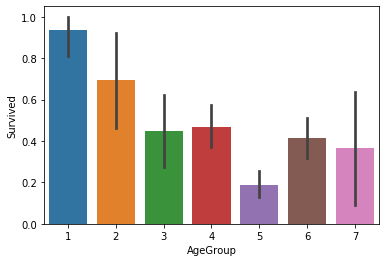

In [261]:
sns.barplot(x="AgeGroup", y="Survived", data=test_results)

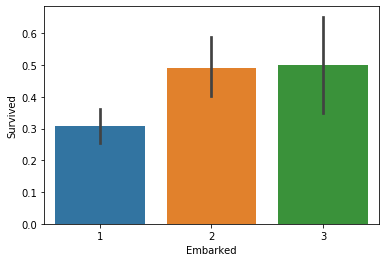

In [262]:
sns.barplot(x="Embarked", y="Survived", data=test_results)
#Southampton (S), Cherbourg (C), Queenstown (Q)

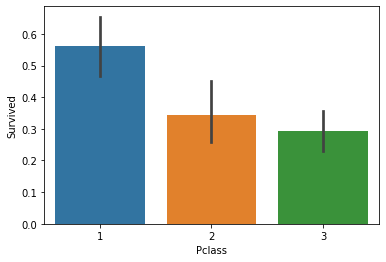

In [263]:
sns.barplot(x="Pclass", y="Survived", data=test_results)